<a href="https://colab.research.google.com/github/JyothiVundavalli/Text-Generation/blob/main/Graduate_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BI-WEEKLY UPDATE-1:
1. Displaying Initial Portions and Random Character Samples:

This section reads the first 200 characters from each text file and prints them.
It then randomly samples 20 characters from each text file and prints them.

2. Splitting Texts into Words and Random Word Sampling:

This section splits the text files into individual words using the split() method.
It then randomly samples 10 words from each list of words and prints them.

3.  Computing Unigram Frequencies:

This section uses the Counter class from the collections library to create frequency counts of each word in each text file.
It then prints the 10 most common words found in each text file.

4. G-test for Distinctiveness:

This section defines a function called compare_counts that takes two word count dictionaries (a_count and b_count) as input.

It calculates the chi-square statistic for each word that appears at least a certain number of times (defined by count_threshold) in one of the texts.

The chi-square statistic is a measure of how likely it is that the observed frequencies of the word in the two texts could have occurred by chance.

The function also identifies which text (A or B) has a higher frequency for that word.

Finally, it sorts the words by their chi-square statistic in descending order and returns a list of tuples containing the word, its chi-square statistic, and the text with the higher frequency.

Another function, count_report, utilizes compare_counts to generate a report on the most and least significant words (based on the chi-square statistic) between the two texts. It prints the top and bottom 10 words (by chi-square statistic) along with the text they are more frequent in.

5. N-gram Generation:

This section defines a function called ngrams_for_sequence that takes the n-gram size (n) and a sequence of elements (text or words) as input.

It generates all possible n-grams (subsequences of length n) from the given sequence.

The code then generates 9-grams from the characters in text_a and 5-grams from the words in text_b.

Finally, it prints 10 random samples from each list of n-grams.

In [ ]:
# Import necessary libraries
import random
from collections import Counter
from scipy.stats import chi2_contingency

# Load the text files
with open("1342-0.txt", "r", encoding="utf-8") as file:
    text_a = file.read()
with open("84-0.txt", "r", encoding="utf-8") as file:
    text_b = file.read()

# 1. Display initial portions and random character samples
print("First 200 characters of Text A:")
print(text_a[:200])
print("\nFirst 200 characters of Text B:")
print(text_b[:200])

# Random character sampling
print("\nRandom 20 characters from Text A:")
print(random.sample(text_a, 20))
print("\nRandom 20 characters from Text B:")
print(random.sample(text_b, 20))

# 2. Split texts into words
a_words = text_a.split()
b_words = text_b.split()

# Random word sampling
print("\nRandom 10 words from Text A:")
print(random.sample(a_words, 10))
print("\nRandom 10 words from Text B:")
print(random.sample(b_words, 10))

# 3. Compute unigram frequencies
a_word_counts = Counter(a_words)
b_word_counts = Counter(b_words)

# Most common words
print("\nMost common words in Text A:")
print(a_word_counts.most_common(10))
print("\nMost common words in Text B:")
print(b_word_counts.most_common(10))

# 4. G-test for distinctiveness
def compare_counts(a_count, b_count, count_threshold=1):
    a_total = sum(a_count.values())
    b_total = sum(b_count.values())
    sigs = []
    for word, a_freq in a_count.items():
        if a_freq <= count_threshold:
            continue
        b_freq = b_count.get(word, 0)
        sigs.append((
            word,
            chi2_contingency([[a_freq, a_total], [b_freq, b_total]], lambda_=0)[0],
            "A" if a_freq > b_freq else "B"
        ))
    sigs.sort(key=lambda x: x[1], reverse=True)
    return sigs

# Generate report
def count_report(a_count, b_count, n=10):
    compared = compare_counts(a_count, b_count)
    print("\nMost significant words:")
    print("-----------------------")
    for word, _, text in compared[:n]:
        print(f"{word} (Text {text})")
    print("\nLeast significant words:")
    print("------------------------")
    for word, _, text in compared[-n:]:
        print(f"{word} (Text {text})")

count_report(a_word_counts, b_word_counts, 10)

# 5. N-gram generation
def ngrams_for_sequence(n, seq):
    return [tuple(seq[i:i + n]) for i in range(len(seq) - n + 1)]

# Generate n-grams
a_9grams = ngrams_for_sequence(9, text_a)
b_word_5grams = ngrams_for_sequence(5, b_words)

# Random samples of n-grams
print("\nRandom 10 character-level 9-grams from Text A:")
print(random.sample(a_9grams, 10))
print("\nRandom 10 word-level 5-grams from Text B:")
print(random.sample(b_word_5grams, 10))

First 200 characters of Text A:
﻿The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away 

First 200 characters of Text B:
﻿
Project Gutenberg's Frankenstein, by Mary Wollstonecraft (Godwin) Shelley

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give 

Random 20 characters from Text A:
['y', 's', '\n', 't', 'o', 'a', 's', ' ', 'I', ' ', 'r', 'r', 'e', 'e', 'd', 'e', 'h', 'r', 'i', ' ']

Random 20 characters from Text B:
['f', 's', 't', ' ', 'l', 'T', 'o', 't', 't', 'a', 'w', 'a', 'l', 'm', '‘', 'e', 'e', 'a', 'n', ' ']

Random 10 words from Text A:
['can,', 'Fitzwilliam,', 'if', 'her', 'politeness,', 'whom', 'him', 'Elizabeth', 'the', 'falsehood!”--and']

Random 10 words from Text B:
['that', 'that', 'happiness', 'the', 'afforded', 'are', 'father', 'proceed.', 'inquietude', 

BI-WEEKLY UPDATE-3:

This code first loads two text files and reads their content into text_a and text_b.

It then splits the texts into words, creating a_words and b_words for further analysis.

 Next, it defines a function to generate n-grams, which extracts sequences of n words from a given list. Using this function, the code generates bigrams (2-word sequences) and trigrams (3-word sequences) for both texts.

 It then counts the occurrences of these n-grams using the Counter class and identifies the most frequent ones. Finally, the script prints the top 10 most common bigrams and trigrams from each text, providing insight into commonly used phrases.

In [ ]:
# Load the text files
with open("1342-0.txt", "r", encoding="utf-8") as file:
    text_a = file.read()
with open("84-0.txt", "r", encoding="utf-8") as file:
    text_b = file.read()

# Split texts into words
a_words = text_a.split()
b_words = text_b.split()

# Define the n-gram function
def ngrams_for_sequence(n, seq):
    return [tuple(seq[i:i + n]) for i in range(len(seq) - n + 1)]

# Generate bigrams and trigrams
a_bigrams = ngrams_for_sequence(2, a_words)
b_bigrams = ngrams_for_sequence(2, b_words)

a_trigrams = ngrams_for_sequence(3, a_words)
b_trigrams = ngrams_for_sequence(3, b_words)

# Most common bigrams and trigrams
a_bigram_counts = Counter(a_bigrams)
b_bigram_counts = Counter(b_bigrams)

a_trigram_counts = Counter(a_trigrams)
b_trigram_counts = Counter(b_trigrams)

print("\nMost common bigrams in Text A:")
print(a_bigram_counts.most_common(10))

print("\nMost common bigrams in Text B:")
print(b_bigram_counts.most_common(10))

print("\nMost common trigrams in Text A:")
print(a_trigram_counts.most_common(10))

print("\nMost common trigrams in Text B:")
print(b_trigram_counts.most_common(10))



Most common bigrams in Text A:
[(('of', 'the'), 485), (('to', 'be'), 425), (('in', 'the'), 381), (('to', 'the'), 261), (('of', 'her'), 242), (('I', 'am'), 237), (('of', 'his'), 228), (('had', 'been'), 192), (('she', 'had'), 166), (('could', 'not'), 166)]

Most common bigrams in Text B:
[(('of', 'the'), 552), (('of', 'my'), 271), (('in', 'the'), 262), (('I', 'was'), 214), (('I', 'had'), 214), (('to', 'the'), 204), (('and', 'the'), 200), (('that', 'I'), 195), (('and', 'I'), 193), (('which', 'I'), 148)]

Most common trigrams in Text A:
[(('as', 'soon', 'as'), 45), (('she', 'could', 'not'), 42), (('I', 'do', 'not'), 39), (('that', 'he', 'had'), 35), (('I', 'am', 'sure'), 35), (('could', 'not', 'be'), 30), (('it', 'would', 'be'), 28), (('as', 'well', 'as'), 27), (('by', 'no', 'means'), 26), (('would', 'have', 'been'), 26)]

Most common trigrams in Text B:
[(('which', 'I', 'had'), 38), (('I', 'could', 'not'), 31), (('I', 'did', 'not'), 31), (('that', 'I', 'had'), 25), (('that', 'I', 'was'),

The below code defines plot_most_common_ngrams, a function that visualizes the top n-grams (bigrams, trigrams, etc.) using a horizontal bar chart. It extracts the most common n-grams, formats them as strings, and plots them with Seaborn and Matplotlib, using color intensity to indicate frequency. The function also allows saving the plot as an image. Finally, it is used to plot the top 10 bigrams and trigrams for two text datasets (a_words and b_words).

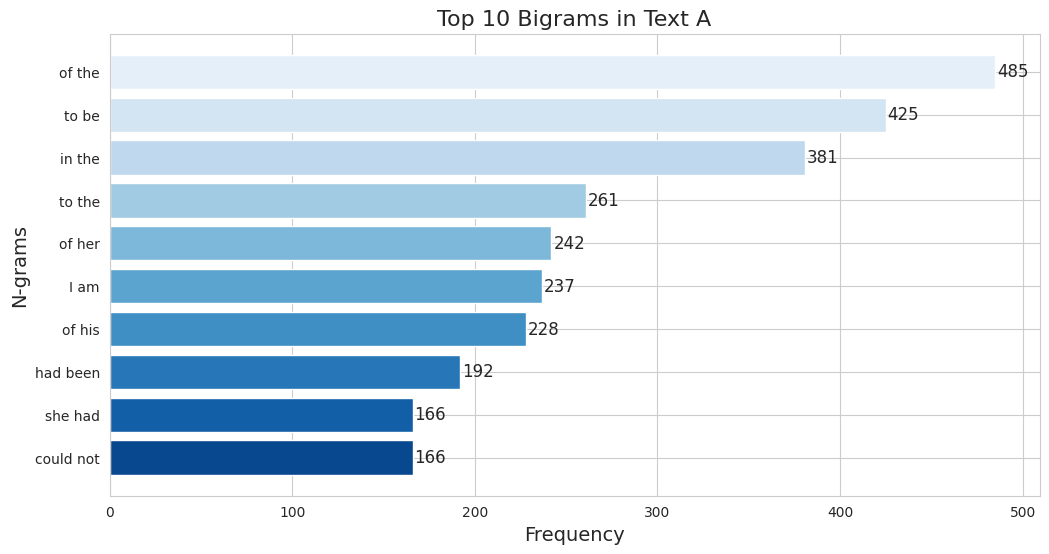

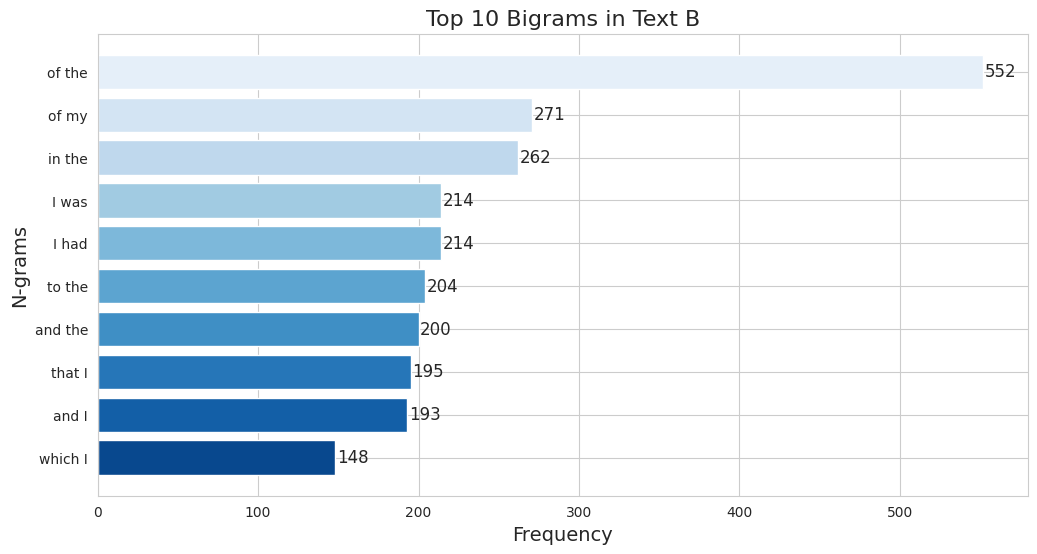

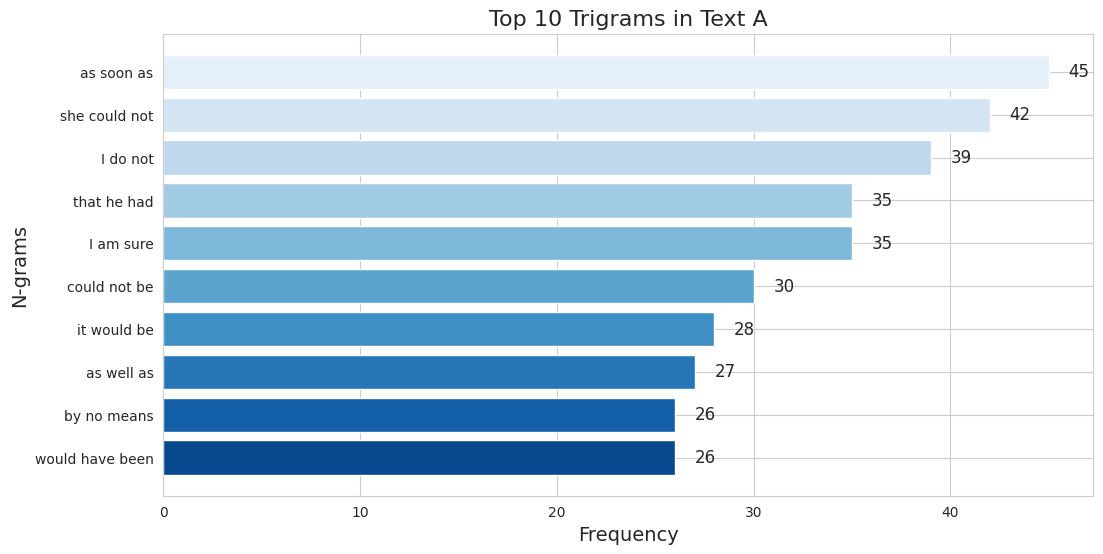

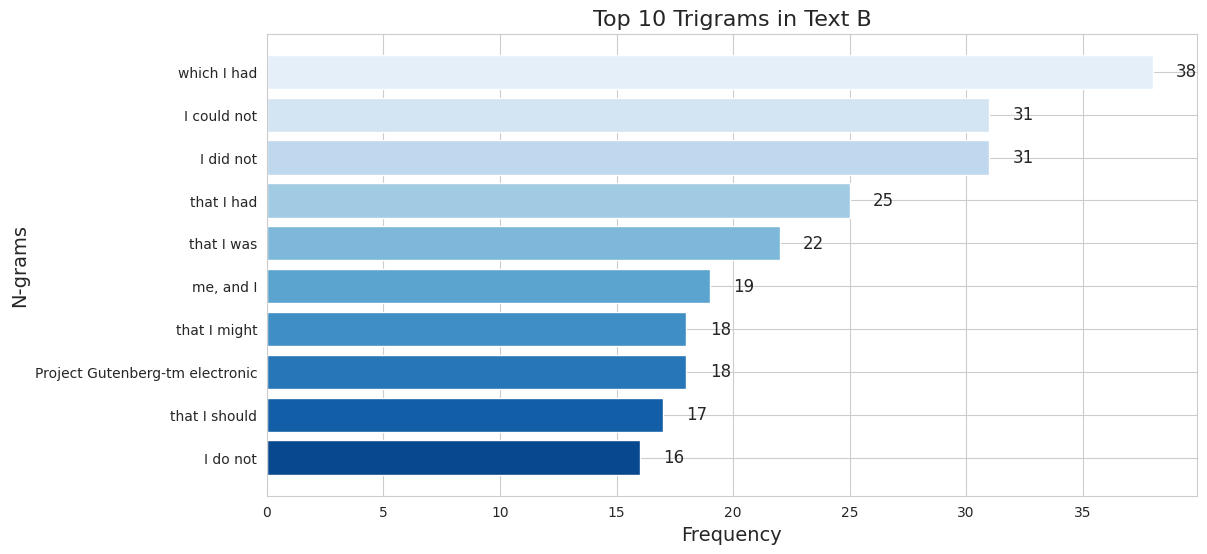

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_most_common_ngrams(ngram_counts, title, n=10, save=False):
    """
    Plot the most common n-grams.

    Parameters:
        ngram_counts (Counter): Counter object of n-gram frequencies.
        title (str): Title of the plot.
        n (int): Number of top n-grams to display.
        save (bool): If True, saves the plot as an image.
    """
    # Get most common n-grams
    common_ngrams = ngram_counts.most_common(n)

    if not common_ngrams:
        print(f"No n-grams found for {title}")
        return

    ngrams, counts = zip(*common_ngrams)
    ngrams = [' '.join(ngram) for ngram in ngrams]  # Convert tuples to strings

    # Set seaborn style for better visuals
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    # Create horizontal bar plot with color intensity based on frequency
    colors = sns.color_palette("Blues", n)
    bars = plt.barh(ngrams, counts, color=colors)

    # Add frequency labels to bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, str(count), va='center', fontsize=12)

    # Set labels and title
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("N-grams", fontsize=14)
    plt.title(title, fontsize=16)
    plt.gca().invert_yaxis()  # Invert axis for best readability

    # Save plot as an image if required
    if save:
        plt.savefig(f"{title.replace(' ', '_')}.png", dpi=300, bbox_inches="tight")

    plt.show()

# Plot most common bigrams and trigrams with improved visualization
plot_most_common_ngrams(Counter(ngrams_for_sequence(2, a_words)), 'Top 10 Bigrams in Text A', 10, save=True)
plot_most_common_ngrams(Counter(ngrams_for_sequence(2, b_words)), 'Top 10 Bigrams in Text B', 10, save=True)

plot_most_common_ngrams(Counter(ngrams_for_sequence(3, a_words)), 'Top 10 Trigrams in Text A', 10, save=True)
plot_most_common_ngrams(Counter(ngrams_for_sequence(3, b_words)), 'Top 10 Trigrams in Text B', 10, save=True)


The below code defines generate_wordcloud, a function that creates and displays a word cloud from the given text. It uses the WordCloud library to generate the cloud, removing common stopwords, and optionally saves the image. The function is then called to generate word clouds for two texts (text_a and text_b).

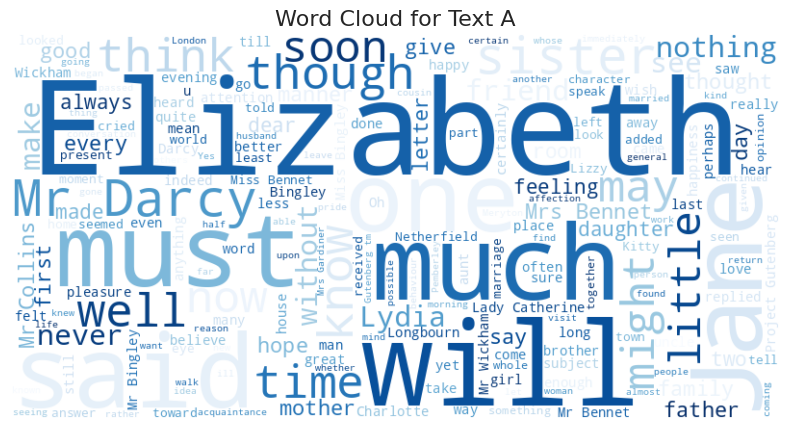

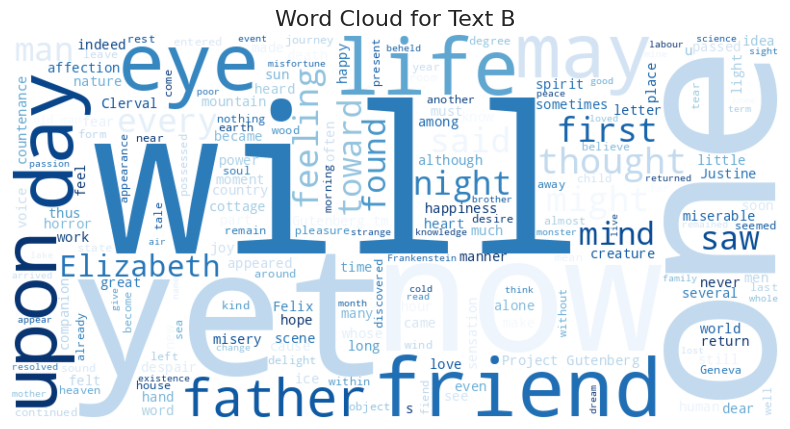

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(text, title, save=False):
    """Generate and display a word cloud for the given text."""
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        width=800, height=400, background_color='white',
        stopwords=stopwords, colormap='Blues'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)

    if save:
        plt.savefig(f"{title.replace(' ', '_')}.png", dpi=300, bbox_inches="tight")

    plt.show()

# Generate Word Clouds
generate_wordcloud(text_a, "Word Cloud for Text A", save=True)
generate_wordcloud(text_b, "Word Cloud for Text B", save=True)


BI-WEEKLY UPDATE-3: In this block, I loaded two text files and created Markov models with a state size of 2, which means the model considers the previous two words when generating the next word. Then, I generated a sentence and a short sentence (max 50 characters) from each model using the make_sentence() and make_short_sentence() methods. (WITHOUT FALLBACK MECHANISM)

In [ ]:
!pip install markovify

import markovify

# Load the text files
with open("1342-0.txt", "r", encoding="utf-8") as file:
    text_a = file.read()

with open("84-0.txt", "r", encoding="utf-8") as file:
    text_b = file.read()

# Create Markov models with default state size (order 2)
generator_a = markovify.Text(text_a, state_size=2)
generator_b = markovify.Text(text_b, state_size=2)

# Generate sentences
print("\nGenerated Sentence from Text A")
print(generator_a.make_sentence())

print("\nGenerated Sentence from Text B")
print(generator_b.make_sentence())

print("\nShort Sentence (Max 50 chars) from Text A")
print(generator_a.make_short_sentence(50))

print("\nShort Sentence (Max 50 chars) from Text B")
print(generator_b.make_short_sentence(50))



Generated Sentence from Text A
I shall see her either at work to get every body away from her, amid very complaisant smiles and tears.

Generated Sentence from Text B
My father tried to imitate the pleasant climate of Italy, and the officer guessed the cause of which I had placed before my hovel to conceal this as much as my sister, I will be the less valuable.

Short Sentence (Max 50 chars) from Text A
None

Short Sentence (Max 50 chars) from Text B
Will no entreaties cause thee to pardon me?


In this block, I used a state size of 1 (instead of 2) to create Markov models, meaning the model considers only the previous word when generating the next one. Additionally, I added fallback functions to retry sentence generation if the model fails to generate a valid sentence or short sentence within 100 tries, returning a default error message if it doesn't succeed.

In [ ]:
!pip install markovify

import markovify

# Load the text files
with open("1342-0.txt", "r", encoding="utf-8") as file:
    text_a = file.read()

with open("84-0.txt", "r", encoding="utf-8") as file:
    text_b = file.read()

# Create Markov models with default state size (order 1)
generator_a = markovify.Text(text_a, state_size=1)
generator_b = markovify.Text(text_b, state_size=1)

# Fallback function to retry sentence generation
def generate_sentence_with_fallback(generator, tries=100, default_response="Could not generate sentence after multiple tries."):
    for _ in range(tries):
        sentence = generator.make_sentence()
        if sentence:
            return sentence
    return default_response

# Fallback function for short sentences
def generate_short_sentence_with_fallback(generator, length=50, tries=100, default_response="Could not generate short sentence after multiple tries."):
    for _ in range(tries):
        short_sentence = generator.make_short_sentence(length)
        if short_sentence:
            return short_sentence
    return default_response

# Generate sentences with fallback
print("\nGenerated Sentence from Text A")
print(generate_sentence_with_fallback(generator_a))

print("\nGenerated Sentence from Text B")
print(generate_sentence_with_fallback(generator_b))

print("\nShort Sentence (Max 50 chars) from Text A")
print(generate_short_sentence_with_fallback(generator_a, length=50))

print("\nShort Sentence (Max 50 chars) from Text B")
print(generate_short_sentence_with_fallback(generator_b, length=50))



Generated Sentence from Text A
Mr. Darcy said they were stronger impression on impartial towards the beautiful expression of the miseries of the necessity of some one's approach; and as he came to be a curricle driving him with fears now, on your accusations were again and the country ensued, on her earnestly; and by reflection, but likewise began her pool of it been so soon perceived, by the secrets which did not very natural self-consequence, which would be.

Generated Sentence from Text B
The spirits that he appeared to animate us.

Short Sentence (Max 50 chars) from Text A
She followed up the only wanted to Jane.

Short Sentence (Max 50 chars) from Text B
There can come to her.


In the updated block, I changed the state size back to 2, meaning the model now considers the previous two words when generating the next word. This allows for more context in sentence generation, potentially resulting in more coherent sentences compared to a state size of 1.

In [ ]:
!pip install markovify

import markovify

# Load the text files
with open("1342-0.txt", "r", encoding="utf-8") as file:
    text_a = file.read()

with open("84-0.txt", "r", encoding="utf-8") as file:
    text_b = file.read()

# Create Markov models with default state size (order 2)
generator_a = markovify.Text(text_a, state_size=2)
generator_b = markovify.Text(text_b, state_size=2)

# Fallback function to retry sentence generation
def generate_sentence_with_fallback(generator, tries=100, default_response="Could not generate sentence after multiple tries."):
    for _ in range(tries):
        sentence = generator.make_sentence()
        if sentence:
            return sentence
    return default_response

# Fallback function for short sentences
def generate_short_sentence_with_fallback(generator, length=50, tries=100, default_response="Could not generate short sentence after multiple tries."):
    for _ in range(tries):
        short_sentence = generator.make_short_sentence(length)
        if short_sentence:
            return short_sentence
    return default_response

# Generate sentences with fallback
print("\nGenerated Sentence from Text A")
print(generate_sentence_with_fallback(generator_a))

print("\nGenerated Sentence from Text B")
print(generate_sentence_with_fallback(generator_b))

print("\nShort Sentence (Max 50 chars) from Text A")
print(generate_short_sentence_with_fallback(generator_a, length=50))

print("\nShort Sentence (Max 50 chars) from Text B")
print(generate_short_sentence_with_fallback(generator_b, length=50))



Generated Sentence from Text A
They repulsed every attempt at persuasion.

Generated Sentence from Text B
What chiefly struck me as one that includes much pain amidst its enjoyments.

Short Sentence (Max 50 chars) from Text A
Mrs. Gardiner about them directly.

Short Sentence (Max 50 chars) from Text B
I cannot describe to you or not.


By changing the state size to 3, the model now considers the previous three words when generating the next word, providing even more context for better sentence construction. This adjustment can improve coherence and continuity in the generated sentences compared to smaller state sizes.

In [ ]:
!pip install markovify

import markovify

# Load the text files
with open("1342-0.txt", "r", encoding="utf-8") as file:
    text_a = file.read()

with open("84-0.txt", "r", encoding="utf-8") as file:
    text_b = file.read()

# Create Markov models with default state size (order 3)
generator_a = markovify.Text(text_a, state_size=3)
generator_b = markovify.Text(text_b, state_size=3)

# Fallback function to retry sentence generation
def generate_sentence_with_fallback(generator, tries=100, default_response="Could not generate sentence after multiple tries."):
    for _ in range(tries):
        sentence = generator.make_sentence()
        if sentence:
            return sentence
    return default_response

# Fallback function for short sentences
def generate_short_sentence_with_fallback(generator, length=50, tries=100, default_response="Could not generate short sentence after multiple tries."):
    for _ in range(tries):
        short_sentence = generator.make_short_sentence(length)
        if short_sentence:
            return short_sentence
    return default_response

# Generate sentences with fallback
print("\nGenerated Sentence from Text A")
print(generate_sentence_with_fallback(generator_a))

print("\nGenerated Sentence from Text B")
print(generate_sentence_with_fallback(generator_b))

print("\nShort Sentence (Max 50 chars) from Text A")
print(generate_short_sentence_with_fallback(generator_a, length=50))

print("\nShort Sentence (Max 50 chars) from Text B")
print(generate_short_sentence_with_fallback(generator_b, length=50))



Generated Sentence from Text A
If you do not know what to make of it.

Generated Sentence from Text B
You will not hear you.

Short Sentence (Max 50 chars) from Text A
Others of the party whom she could not leave her.

Short Sentence (Max 50 chars) from Text B
But these gave place to delight and rapture.


By changing the state size to 4, the model considers the previous four words when generating the next one, further increasing context awareness. This larger state size can result in more fluent and contextually accurate sentences, especially in complex text, but might also lead to fewer valid sentences due to the higher dependency on longer sequences.

In [ ]:
!pip install markovify

import markovify

# Load the text files
with open("1342-0.txt", "r", encoding="utf-8") as file:
    text_a = file.read()

with open("84-0.txt", "r", encoding="utf-8") as file:
    text_b = file.read()

# Create Markov models with default state size (order 4)
generator_a = markovify.Text(text_a, state_size=4)
generator_b = markovify.Text(text_b, state_size=4)

# Fallback function to retry sentence generation
def generate_sentence_with_fallback(generator, tries=100, default_response="Could not generate sentence after multiple tries."):
    for _ in range(tries):
        sentence = generator.make_sentence()
        if sentence:
            return sentence
    return default_response

# Fallback function for short sentences
def generate_short_sentence_with_fallback(generator, length=50, tries=100, default_response="Could not generate short sentence after multiple tries."):
    for _ in range(tries):
        short_sentence = generator.make_short_sentence(length)
        if short_sentence:
            return short_sentence
    return default_response

# Generate sentences with fallback
print("\nGenerated Sentence from Text A")
print(generate_sentence_with_fallback(generator_a))

print("\nGenerated Sentence from Text B")
print(generate_sentence_with_fallback(generator_b))

print("\nShort Sentence (Max 50 chars) from Text A")
print(generate_short_sentence_with_fallback(generator_a, length=50))

print("\nShort Sentence (Max 50 chars) from Text B")
print(generate_short_sentence_with_fallback(generator_b, length=50))



Generated Sentence from Text A
Miss Bennet was therefore established as a sweet girl, and one whom they would not object to know more of.

Generated Sentence from Text B
The snows descended on my head, and I saw the grave-worms crawling in the folds of the flannel.

Short Sentence (Max 50 chars) from Text A
In spite of what her sister must endure.

Short Sentence (Max 50 chars) from Text B
My companion must be of the same nature as man.


By setting the state size to 5, the model now uses the previous five words to predict the next word. This increases the level of context the model takes into account, which can improve sentence quality, but may also reduce the number of valid sentences generated, as the model becomes more strict about matching long sequences

In [ ]:
!pip install markovify

import markovify

# Load the text files
with open("1342-0.txt", "r", encoding="utf-8") as file:
    text_a = file.read()

with open("84-0.txt", "r", encoding="utf-8") as file:
    text_b = file.read()

# Create Markov models with default state size (order 5)
generator_a = markovify.Text(text_a, state_size=5)
generator_b = markovify.Text(text_b, state_size=5)

# Fallback function to retry sentence generation
def generate_sentence_with_fallback(generator, tries=100, default_response="Could not generate sentence after multiple tries."):
    for _ in range(tries):
        sentence = generator.make_sentence()
        if sentence:
            return sentence
    return default_response

# Fallback function for short sentences
def generate_short_sentence_with_fallback(generator, length=50, tries=100, default_response="Could not generate short sentence after multiple tries."):
    for _ in range(tries):
        short_sentence = generator.make_short_sentence(length)
        if short_sentence:
            return short_sentence
    return default_response

# Generate sentences with fallback
print("\nGenerated Sentence from Text A")
print(generate_sentence_with_fallback(generator_a))

print("\nGenerated Sentence from Text B")
print(generate_sentence_with_fallback(generator_b))

print("\nShort Sentence (Max 50 chars) from Text A")
print(generate_short_sentence_with_fallback(generator_a, length=50))

print("\nShort Sentence (Max 50 chars) from Text B")
print(generate_short_sentence_with_fallback(generator_b, length=50))



Generated Sentence from Text A
Could not generate sentence after multiple tries.

Generated Sentence from Text B
The summer months passed while I was thus engaged, heart and soul, in the pursuit of some discoveries which I hoped to make.

Short Sentence (Max 50 chars) from Text A
Could not generate short sentence after multiple tries.

Short Sentence (Max 50 chars) from Text B
Could not generate short sentence after multiple tries.


BI-WEEKLY UPDATE-4: Here, two Markov models with different state size values (1 for randomness and 4 for coherence) are created. This demonstrates how adjusting the order affects sentence structure, from random to more structured outputs.

In [ ]:
# Create Markov models with different orders
gen_a_1 = markovify.Text(text_a, state_size=1)  # More randomness
gen_a_4 = markovify.Text(text_a, state_size=4)  # More structured

gen_b_1 = markovify.Text(text_b, state_size=1)  # More randomness
gen_b_4 = markovify.Text(text_b, state_size=4)  # More structured

# Output sentences for different orders
print("\nOrder 1 (More Random) from Text A")
print(gen_a_1.make_sentence(test_output=False))

print("\nOrder 4 (More Coherent) from Text A")
print(gen_a_4.make_sentence(test_output=False))

print("\nOrder 1 (More Random) from Text B")
print(gen_b_1.make_sentence(test_output=False))

print("\nOrder 4 (More Coherent) from Text B")
print(gen_b_4.make_sentence(test_output=False))



Order 1 (More Random) from Text A
The only right to say to Meryton, where she should have been.

Order 4 (More Coherent) from Text A
I was right, therefore, my last letter had never reached her.

Order 1 (More Random) from Text B
The Foundation's principal office is nearly a convent at the winds whispered in reflection.

Order 4 (More Coherent) from Text B
The appearance of Justine was calm.


This block defines a custom character-level Markov model, where text is processed at the character level rather than word level. By setting state size to 7, it generates sentences with a finer, more complex structure.

In [ ]:
class SentencesByChar(markovify.Text):
    def word_split(self, sentence):
        return list(sentence)  # Split into characters

    def word_join(self, words):
        return "".join(words)  # Rejoin characters

# Create a character-level model for both Text A and Text B with order 7
gen_a_char = SentencesByChar(text_a, state_size=7)
gen_b_char = SentencesByChar(text_b, state_size=7)

# Generate text with the character model
print("\nCharacter-Level Markov Model from Text A")
print(gen_a_char.make_sentence(test_output=False).replace("\n", " "))

print("\nCharacter-Level Markov Model from Text B")
print(gen_b_char.make_sentence(test_output=False).replace("\n", " "))



Character-Level Markov Model from Text A
She had just gained in the feelings which the kind of me; and she was beyond the chambermaid whether should very well.

Character-Level Markov Model from Text B
Your favourite was mentioned the corpse of my being her illness, of whose knowledge and pointing to the inn, but when the sweetest I had given to some uncommon projectors.


The code combines two Markov models with different weights (50-50, 70-30, 30-70) to generate hybrid sentences. Adjusting the weights changes the influence of each text, affecting the generated output's style and content.

In [ ]:
# Combine the models with equal weight (50% each)
combo = markovify.combine([generator_a, generator_b], [0.5, 0.5])

# Generate a sentence from the combined model
print("\nHybrid Model (Mix of Text A & B with 50% Text A and 50% Text B)")
print(combo.make_sentence())

# Combine the models with different weights
combo = markovify.combine([generator_a, generator_b], [0.7, 0.3])  # Text A gets more weight

# Generate a sentence from the combined model
print("\nHybrid Model (Mix of Text A & B with 70% Text A and 30% Text B)")
print(combo.make_sentence())

# Another combination with different weights
combo = markovify.combine([generator_a, generator_b], [0.3, 0.7])  # Text B gets more weight

# Generate a sentence from the combined model
print("\nHybrid Model (Mix of Text A & B with 30% Text A and 70% Text B)")
print(combo.make_sentence())


Hybrid Model (Mix of Text A & B with 50% Text A and 50% Text B)
I started up and down in a dream but for an interval reconciled me to others and intolerable to myself.

Hybrid Model (Mix of Text A & B with 70% Text A and 30% Text B)
Elizabeth had already had Mrs. Bennet was so much an intruder as she did; I can offer would be asked; and fearful, on the seashore.

Hybrid Model (Mix of Text A & B with 30% Text A and 70% Text B)
But, as if she had willingly turned to gall and bitterness.


BI-WEEKLY UPDATE-5: In this block, a function to generate sentences from a Markov chain model is defined, with retries to handle failed sentence generation. The sentences are then preprocessed by converting text to lowercase and removing non-alphabetic characters. A total of 1000 sentences are generated for each Markov model, and these sentences are preprocessed accordingly. The generated and preprocessed sentences are printed for each model to inspect the output.

In [ ]:
# Generate sentences
def generate_sentence(model, retries=5):
    for _ in range(retries):
        sentence = model.make_sentence(tries=100)
        if sentence:
            return sentence
    return None

# Preprocess text
def preprocess_text(text):
    return re.sub(r"[^a-z\s]", "", text.lower()) if text else ""

# Generate and preprocess sentences
num_samples = 1000
generated_sentences = [Parallel(n_jobs=-1)(delayed(generate_sentence)(model) for _ in range(num_samples)) for model in markov_models]
processed_sentences = [[preprocess_text(s) for s in sentences if s] for sentences in generated_sentences]

# Print sample sentences
print("Sample Generated Sentences:")
print(f"Markov Model A: {processed_sentences[0][0]}")
print(f"Markov Model B: {processed_sentences[1][0]}")


Sample Generated Sentences:
Markov Model A: they were then with no very difficult point
Markov Model B: i awoke and my passions vehement but by degrees to have taken so strong a hold of my journey


Here, two Markov models are trained using texts from Pride and Prejudice and Frankenstein. Sentences are generated from these models, preprocessed, and used to create a balanced dataset. The dataset is then used to train a Naïve Bayes classifier, which classifies sentences based on their source text. The classifier's performance is evaluated using metrics like accuracy, precision, recall, and F1-score, followed by a visualization of the confusion matrix.

Accuracy – How often predictions were correct

Precision – How many of the predicted sentences were actually correct

Recall – How well the model identified sentences from each book

F1-Score – A balance of precision and recall

Classifier Performance:
Accuracy: 0.9450, Precision: 0.9686, Recall: 0.9204, F1-score: 0.9439


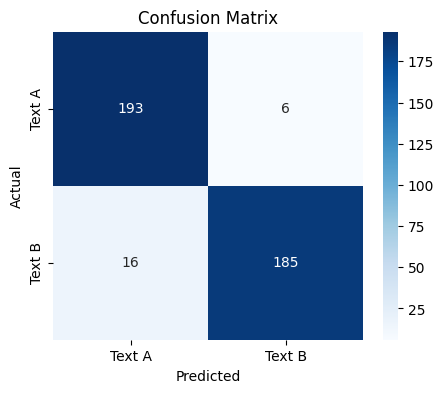

In [ ]:
import markovify
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load texts
def load_text(file_path):
    with open(file_path, encoding="utf-8") as f:
        return f.read()

text_a = load_text("1342-0.txt")  # Pride and Prejudice
text_b = load_text("84-0.txt")    # Frankenstein

# Train Markov models
def train_markov_model(text, state_size=2):
    return markovify.Text(text, state_size=state_size)

model_a = train_markov_model(text_a, state_size=2)
model_b = train_markov_model(text_b, state_size=2)

# Generate sentences
def generate_sentence(model, retries=5):
    for _ in range(retries):
        sentence = model.make_sentence(tries=100)
        if sentence:
            return sentence
    return None

# Preprocess text
def preprocess_text(text):
    if text is None:
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

# Generate dataset
num_samples = 1000
sentences_a = [preprocess_text(generate_sentence(model_a)) for _ in range(num_samples)]
sentences_b = [preprocess_text(generate_sentence(model_b)) for _ in range(num_samples)]

# Remove empty sentences
sentences_a = [s for s in sentences_a if s]
sentences_b = [s for s in sentences_b if s]
min_len = min(len(sentences_a), len(sentences_b))
sentences_a, sentences_b = sentences_a[:min_len], sentences_b[:min_len]

# Labels and data
labels = [0] * min_len + [1] * min_len
data = sentences_a + sentences_b

# Feature extraction
vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train Naïve Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Classifier Performance:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Text A", "Text B"], yticklabels=["Text A", "Text B"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In this block, the same process as in Block 2 is extended to three datasets: Pride and Prejudice, Frankenstein, and Harry Potter. Multiple Markov models are trained, and sentences are generated and preprocessed for each dataset. A balanced dataset is created, and a Naïve Bayes classifier is trained to classify sentences into one of the three texts. The classifier's performance is evaluated with metrics, and the results are visualized through a confusion matrix, which shows how well the classifier distinguishes between the three datasets.

Classifier Performance:
Accuracy: 0.9500, Precision: 0.9502, Recall: 0.9500, F1-score: 0.9499


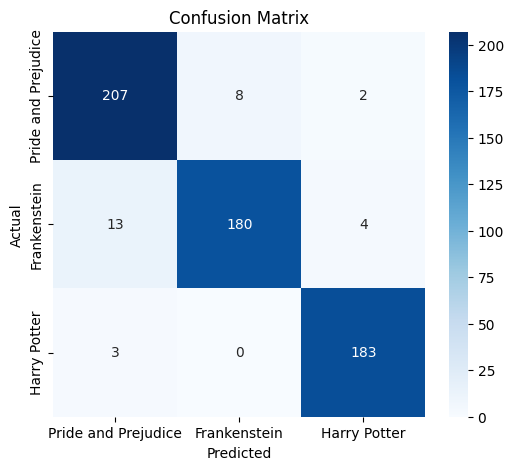

In [ ]:
import markovify
import re
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load multiple datasets
dataset_files = ["1342-0.txt", "84-0.txt", "HarryPotter1.txt"]
dataset_names = ["Pride and Prejudice", "Frankenstein", "Harry Potter"]

def load_text(file_path):
    with open(file_path, encoding="utf-8") as f:
        return f.read()

# Load datasets
datasets = [load_text(f) for f in dataset_files]

# Train Markov models
markov_models = [markovify.Text(text, state_size=2) for text in datasets]

# Generate sentences
def generate_sentence(model, retries=5):
    for _ in range(retries):
        sentence = model.make_sentence(tries=100)
        if sentence:
            return sentence
    return None

# Preprocess text
def preprocess_text(text):
    return re.sub(r"[^a-z\s]", "", text.lower()) if text else ""

# Generate and preprocess sentences
num_samples = 1000
generated_sentences = [Parallel(n_jobs=-1)(delayed(generate_sentence)(model) for _ in range(num_samples)) for model in markov_models]
processed_sentences = [[preprocess_text(s) for s in sentences if s] for sentences in generated_sentences]

# Balance dataset sizes
min_len = min(len(s) for s in processed_sentences)
processed_sentences = [s[:min_len] for s in processed_sentences]

# Create labels and dataset
labels = [i for i, sentences in enumerate(processed_sentences) for _ in range(min_len)]
data = sum(processed_sentences, [])

# Feature extraction using n-grams
vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train Naïve Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print performance results
print(f"Classifier Performance:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=dataset_names, yticklabels=dataset_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


This block extends the previous work by adding a fourth dataset, Harry Potter 2, to the mix, along with the original three datasets. As before, Markov models are trained, and sentences are generated and preprocessed. The classifier is then trained to distinguish between the four datasets, with evaluation metrics (accuracy, precision, recall, F1-score) and a confusion matrix to show how well the classifier performs with this expanded set of datasets. The results indicate the model's ability to differentiate between more diverse text sources.

Classifier Performance:
Accuracy: 0.8838, Precision: 0.8828, Recall: 0.8838, F1-score: 0.8830


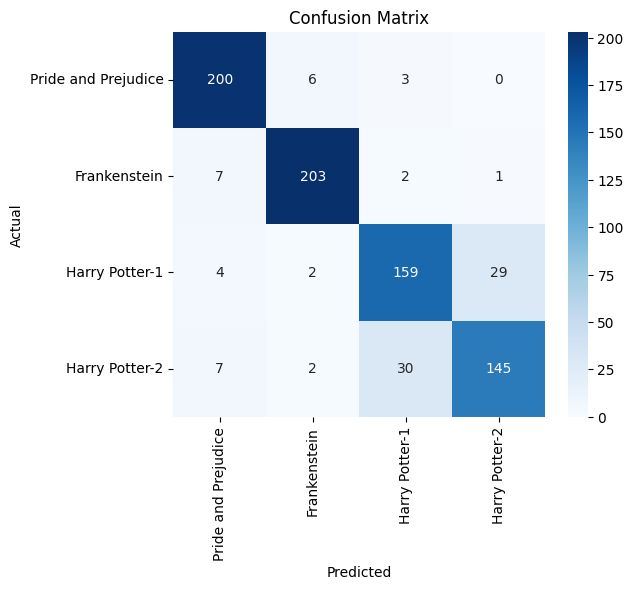

In [ ]:
import markovify
import re
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load multiple datasets
dataset_files = ["1342-0.txt", "84-0.txt", "HarryPotter1.txt", "HarryPotter2.txt"]
dataset_names = ["Pride and Prejudice", "Frankenstein", "Harry Potter-1", "Harry Potter-2"]

def load_text(file_path):
    with open(file_path, encoding="utf-8") as f:
        return f.read()

# Load datasets
datasets = [load_text(f) for f in dataset_files]

# Train Markov models
markov_models = [markovify.Text(text, state_size=2) for text in datasets]

# Generate sentences
def generate_sentence(model, retries=5):
    for _ in range(retries):
        sentence = model.make_sentence(tries=100)
        if sentence:
            return sentence
    return None

# Preprocess text
def preprocess_text(text):
    return re.sub(r"[^a-z\s]", "", text.lower()) if text else ""

# Generate and preprocess sentences
num_samples = 1000
generated_sentences = [Parallel(n_jobs=-1)(delayed(generate_sentence)(model) for _ in range(num_samples)) for model in markov_models]
processed_sentences = [[preprocess_text(s) for s in sentences if s] for sentences in generated_sentences]

# Balance dataset sizes
min_len = min(len(s) for s in processed_sentences)
processed_sentences = [s[:min_len] for s in processed_sentences]

# Create labels and dataset
labels = [i for i, sentences in enumerate(processed_sentences) for _ in range(min_len)]
data = sum(processed_sentences, [])

# Feature extraction using n-grams
vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train Naïve Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print performance results
print(f"Classifier Performance:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=dataset_names, yticklabels=dataset_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


BI-WEEKLY UPDATE-6: This code compares Markov chain-generated text from Pride and Prejudice and Frankenstein to classify sentences based on their origin. It uses multiple classifiers (Naive Bayes, Logistic Regression, SVM, and Decision Trees) to evaluate text classification performance, visualizing results with confusion matrices. The project concludes with an analysis of classifier effectiveness using various evaluation metrics.


Naive Bayes Results:
Accuracy: 0.9300
Precision: 0.9347
Recall: 0.9254
F1: 0.9300


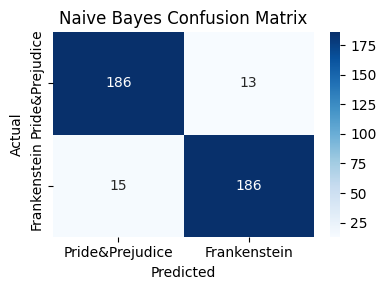


Logistic Regression Results:
Accuracy: 0.8650
Precision: 0.8551
Recall: 0.8806
F1: 0.8676


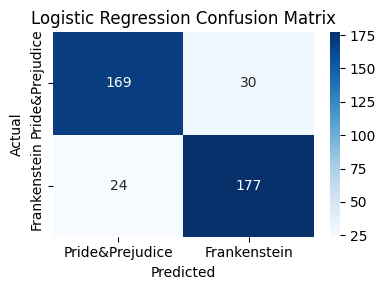


SVM Results:
Accuracy: 0.7975
Precision: 0.7158
Recall: 0.9900
F1: 0.8309


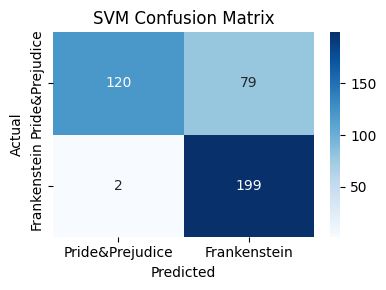


Decision Tree Results:
Accuracy: 0.7175
Precision: 0.8143
Recall: 0.5672
F1: 0.6686


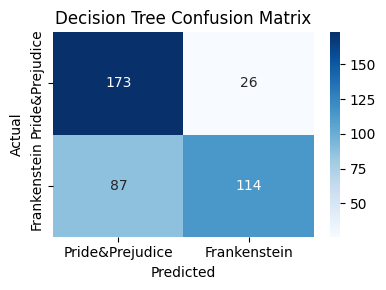

In [ ]:
import markovify
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load texts
def load_text(file_path):
    with open(file_path, encoding="utf-8") as f:
        return f.read()

text_a = load_text("1342-0.txt")  # Pride and Prejudice
text_b = load_text("84-0.txt")    # Frankenstein

# Train Markov models
def train_markov_model(text, state_size=2):
    return markovify.Text(text, state_size=state_size)

model_a = train_markov_model(text_a, state_size=2)
model_b = train_markov_model(text_b, state_size=2)

# Generate sentences
def generate_sentence(model, retries=5):
    for _ in range(retries):
        sentence = model.make_sentence(tries=100)
        if sentence:
            return sentence
    return None

# Preprocess text
def preprocess_text(text):
    if text is None:
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

# Generate dataset
num_samples = 1000
sentences_a = [preprocess_text(generate_sentence(model_a)) for _ in range(num_samples)]
sentences_b = [preprocess_text(generate_sentence(model_b)) for _ in range(num_samples)]

# Remove empty sentences
sentences_a = [s for s in sentences_a if s]
sentences_b = [s for s in sentences_b if s]
min_len = min(len(sentences_a), len(sentences_b))
sentences_a, sentences_b = sentences_a[:min_len], sentences_b[:min_len]

# Labels and data
labels = [0] * min_len + [1] * min_len
data = sentences_a + sentences_b

# Feature extraction
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(data)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Classifier models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Evaluation results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1": f1_score(y_test, preds, zero_division=0)
    }
    print(f"\n{name} Results:")
    for metric, score in results[name].items():
        print(f"{metric}: {score:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Pride&Prejudice", "Frankenstein"], yticklabels=["Pride&Prejudice", "Frankenstein"])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()